In [30]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np

files = ["fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1",
        "mpi_N2_18_1-nf", "mpi_N4_18_1-nf", "fcio_18_1-nf", "wnio_18_1-nf",
        "fc_18_1-nf", "wn_18_1-nf", "fc_18_0-nolatency", "wn_18_0-nolatency",
        "fc_18_1-nolatency", "wn_18_1-nolatency"
        ]
mpifile = ["mpi_18_1","mpi_18_0"]
head = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')
# headmax = ('elem', 'n', 'pN', 'min_e', 'max_e', 'avg_e', 'size', 'nerror', 'l2_error')

headmain = ("elements",
        "fc_18_0", "fc_18_1", "fcio_18_0", "fcio_18_1",
        "wn_18_0", "wn_18_1","wnio_18_0", "wnio_18_1",
        "mpi_N2_18_0","mpi_N2_18_1", "mpi_N4_18_0","mpi_N4_18_1")
dataraw = pd.DataFrame(columns=headmain)
datampi = pd.DataFrame(columns=headmain)
datafile = pd.read_csv('final_consolidated.csv'
                        , delimiter=',',
                          names=headmain, skiprows=1)
dataraw['elements'] = datafile['elements']

# print(data)
for file in files:
    filename = 'final_'+file+'.csv'
    print(filename)
    datafile = pd.read_csv(filename, delimiter=',',
                          names=head, skiprows=1)
    if "latency" in file:
        if "18_0" in file:
            file = file.replace('18_0-nolatency', 'nolat_18_0')
        else:
            file = file.replace('18_1-nolatency', 'nolat_18_1')
    if "-nf" in file:
        file = file.replace('18_1-nf', 'nf_18_1')

    dataraw[file+'_min'] = datafile['min_e']
    dataraw[file+'_max'] = datafile['max_e']
    dataraw[file] = datafile['avg_e']



dataraw = dataraw.sort_values(by=['elements'])
data_1k = dataraw[0:30]
data_2k = dataraw[30:60]
data_5k = dataraw[60:90]
data_10k = dataraw[90:120]
data_20k = dataraw[120:150]
data_50k = dataraw[150:180]
data_100k = dataraw[180:210]
data_200k = dataraw[210:240]

data = pd.DataFrame(columns=dataraw.columns)
data.loc['1k'] = data_1k.mean()
data.loc['2k'] = data_2k.mean()
data.loc['5k'] = data_5k.mean()
data.loc['10k'] = data_10k.mean()
data.loc['20k'] = data_20k.mean()
data.loc['50k'] = data_50k.mean()
data.loc['100k'] = data_100k.mean()
data.loc['200k'] = data_200k.mean()

for file in files:
    if "latency" in file:
        if "18_0" in file:
            file = file.replace('18_0-nolatency', 'nolat_18_0')
        else:
            file = file.replace('18_1-nolatency', 'nolat_18_1')
    if "-nf" in file:
        file = file.replace('18_1-nf', 'nf_18_1')
    data[file+'_min'] = data[file] - data[file+'_min']
    data[file+'_max'] = data[file+'_max'] - data[file]


for file in mpifile:
    filename = 'final_'+file+'.csv'
    print(filename)
    datafile = pd.read_csv(filename, delimiter=',',
                          names=head, skiprows=1)
    if "latency" in file:
        if "18_0" in file:
            file = file.replace('18_0-nolatency', 'nolat_18_0')
        else:
            file = file.replace('18_1-nolatency', 'nolat_18_1')
    if "-nf" in file:
        file = file.replace('18_1-nf', 'nf_18_1')

    datampi[file+'_min'] = datafile['min_e']
    datampi[file+'_max'] = datafile['max_e']
    datampi[file] = datafile['avg_e']

print(datampi)
# data['fc_mpi_N4_18_1'] = data['mpi_N4_18_1']/ data['fc_18_1']
# data['fc_mpi_N4_18_0'] = data['mpi_N4_18_0']/data['fc_18_0']

# data['fcio_mpi_N4_18_1'] = data['mpi_N4_18_1'] / data['fcio_18_1']
# data['fcio_mpi_N4_18_0'] = data['mpi_N4_18_0'] / data['fcio_18_0']

# data['wn_mpi_N2_18_1'] = data['mpi_N2_18_1'] / data['wn_18_1']
# data['wn_mpi_N2_18_0'] = data['mpi_N2_18_0'] / data['wn_18_0']

# data['wnio_mpi_N2_18_1'] = data['mpi_N2_18_1'] / data['wnio_18_1']
# data['wnio_mpi_N2_18_0'] = data['mpi_N2_18_0'] / data['wnio_18_0']
data = data.reset_index()
# data
# print(data[['elements','size']])
def add_annotation(ax, data, name):
    count = 0
    for index, entry in data.iterrows():
    
        if entry[name] > 1.0:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count,entry[name]), color='green',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        else:
            ax.annotate("{:.2f}".format(entry[name]), xy=(count, entry[name]), color='red',
                              textcoords='offset points', xytext=(-4,4),
                              bbox=dict(boxstyle="round", fc="1"))
        count = count+1
def plot_data(ax, data1, data2, yerr, linestyle='-', color='c'):
    data1.plot(x='elements', kind='bar', rot = 0, ax=ax, yerr = yerr, capsize=4, colormap='Paired')
    ax2 = ax.twinx()
    data2.plot(x='index', linestyle=linestyle, marker='o', color=color, ax = ax2)
    return ax2
    # print(data1[['elem','per_opt_mpi']])

def plot_comparison(designs,colors, lines, nrows=0, ncols=1, savename=None, ylim=None):
    figk_ax2 = []
    if nrows==0:
        nrows = len(designs)
    figk_fig, figk_ax  = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6,5), tight_layout=True)
    current = 0
    design1 = None
    design2 = None
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr] = data[d1+'_'+vstr]/ data[d2+'_'+vstr]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
        ax = figk_ax[current]
        err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d2+'_'+vstr+'_min',d2+'_'+vstr+'_max']].T.values
        ax2 = plot_data(ax, data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
                        err,
                       lines[current], colors[current])
        figk_ax2.append(ax2)
        add_annotation(ax2, data[['index',d2+'_'+d1+'_'+vstr]], d2+'_'+d1+'_'+vstr)
        figk_ax[current].set_title("\n".join(wrap(d2+' vs '+d1+' ('+vstr+')', 60)))
        ax.set_xlabel('Mesh Elements')
        ax.set_ylabel('Time (in secs)')

        ax2.set_ylabel('Speedup', color=colors[current])
        if ylim:
            ax2.set_ylim(ylim[0], ylim[1])
        ax2.get_legend().remove()
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1+h2, [design1, design2, 'Speedup'], loc=1)
        current = current+1
     
    if savename == None:
        figk_fig.savefig(d2+'_'+d1+'.pgf')
        figk_fig.savefig(d2+'_'+d1+'.pdf')
    else:
        figk_fig.savefig(str(savename)+'.pgf')
        figk_fig.savefig(str(savename)+'.pdf')
    return figk_ax, figk_ax2

def plot_speedupdata(ax, data, linestyle='-', color='c', label=None):
    if label:
        print("label "+label)
        data.plot(x='index', linestyle=linestyle, marker='o', color=color, ax = ax, label=label)
    else:
        data.plot(x='index', linestyle=linestyle, marker='o', color=color, ax = ax)

def format_xaxis(value, tick_number):
#     if()
#     datasize = float("{0:.2f}".format(value/(1024*1024)))
    print("format axis")
    values = ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k']
    print(value, tick_number)
    return values[tick_number]

def plot_speedup(designs, colors, lines, title, savename=None, a=True, ylim=None):
    figk_ax2 = []
    figk_fig, figk_ax  = plt.subplots(figsize=(6,4), tight_layout=True)
    current = 0
    design1 = None
    design2 = None
    labels = []
#     figk_ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis)) 
    for d1, d2, vstr in designs:
        data[d2+'_'+d1+'_'+vstr] = data[d1+'_'+vstr]/ data[d2+'_'+vstr]
        print(d1, d2, vstr)
        design1 = d1
        design2 = d2
        labels.append(d2)
#         err = data[[d1+'_'+vstr+'_min',d1+'_'+vstr+'_max', d1+'_'+vstr+'_min',d1+'_'+vstr+'_max']].T.values
#         ax2 = plot_data(figk_ax[current], data[['elements', d1+'_'+vstr, d2+'_'+vstr]], data[['index',d2+'_'+d1+'_'+vstr]],
#                         err)
        plot_speedupdata(figk_ax, data[['index',d2+'_'+d1+'_'+vstr]], lines[current], colors[current])
#         figk_ax2.append(ax2)
        if a:
            add_annotation(figk_ax, data[['index',d2+'_'+d1+'_'+vstr]], d2+'_'+d1+'_'+vstr)
        
        current = current+1
    
    figk_ax.set_title("\n".join(wrap(title, 60)))
    figk_ax.set_ylabel('Speedup')
    if ylim:
        figk_ax.set_ylim(ylim[0], ylim[1])
#     ax2.get_legend().remove()
    h1, l1 = figk_ax.get_legend_handles_labels()
#     print(l1)
#     figk_ax.get_legend().remove()
#     h2, l2 = ax2.get_legend_handles_labels()
    figk_ax.legend(h1, labels, loc=1)
#     print(data['index'])
    figk_ax.set_xticklabels(['10','1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k'])
    figk_ax.set_xlabel('Mesh Elements')
#     figk_ax.legend()
    

    if savename == None:
        savename =d2+'_'+d1
    
    print('Saving file in '+str(savename))
    figk_fig.savefig(str(savename)+'.pgf')
    figk_fig.savefig(str(savename)+'.pdf')


#     return datasize     


final_fc_18_0.csv
final_fc_18_1.csv
final_fcio_18_0.csv
final_fcio_18_1.csv
final_wn_18_0.csv
final_wn_18_1.csv
final_wnio_18_0.csv
final_wnio_18_1.csv
final_mpi_N2_18_0.csv
final_mpi_N2_18_1.csv
final_mpi_N4_18_0.csv
final_mpi_N4_18_1.csv
final_mpi_N2_18_1-nf.csv
final_mpi_N4_18_1-nf.csv
final_fcio_18_1-nf.csv
final_wnio_18_1-nf.csv
final_fc_18_1-nf.csv
final_wn_18_1-nf.csv
final_fc_18_0-nolatency.csv
final_wn_18_0-nolatency.csv
final_fc_18_1-nolatency.csv
final_wn_18_1-nolatency.csv
final_mpi_18_1.csv
final_mpi_18_0.csv
                                       elements fc_18_0 fc_18_1 fcio_18_0  \
102045 1  3 5.368690 5.368690 5.368690      NaN     NaN     NaN       NaN   
            5.369231 5.369231 5.369231      NaN     NaN     NaN       NaN   
            5.367240 5.367240 5.367240      NaN     NaN     NaN       NaN   
            5.368121 5.368121 5.368121      NaN     NaN     NaN       NaN   
            5.367452 5.367452 5.367452      NaN     NaN     NaN       NaN   
          

<IPython.core.display.Javascript object>


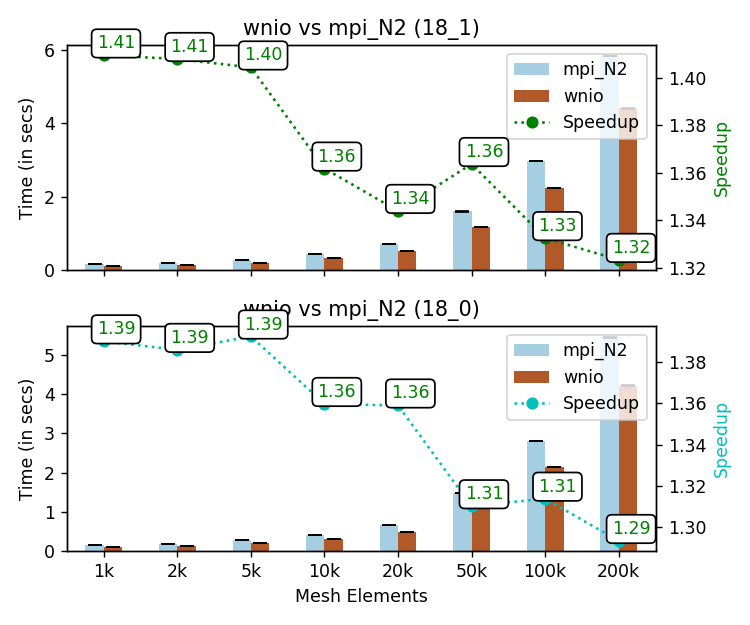

mpi_N2 wnio 18_1
mpi_N2 wnio 18_0


<IPython.core.display.Javascript object>


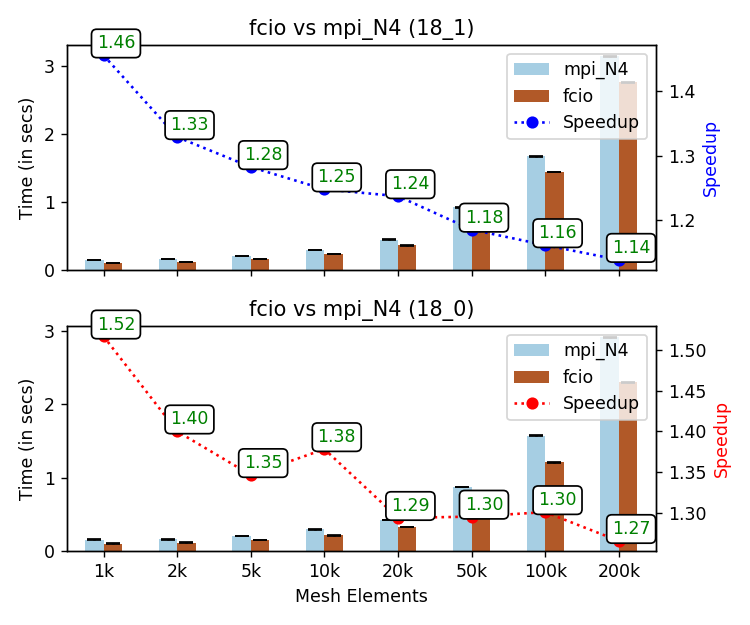

mpi_N4 fcio 18_1
mpi_N4 fcio 18_0


In [2]:
############################################
# MPI vs IO channels
############################################


designs = [['mpi_N2', 'wnio', '18_1'], ['mpi_N2', 'wnio', '18_0'], ['mpi_N4', 'fcio', '18_1'], ['mpi_N4', 'fcio', '18_0']]
colors = ['g','c','b','r']
lines = [':',':',':',':']
plot_comparison(designs[:2], colors[:2], lines, savename='comp_mpiio_1')
plot_comparison(designs[2:], colors[2:], lines, savename='comp_mpiio_2')


# plot_speedup(designs, colors, lines, 'Compararions of MPI MIDG2 and IO channels designs', savename='mpiio_all', a=False)


<IPython.core.display.Javascript object>


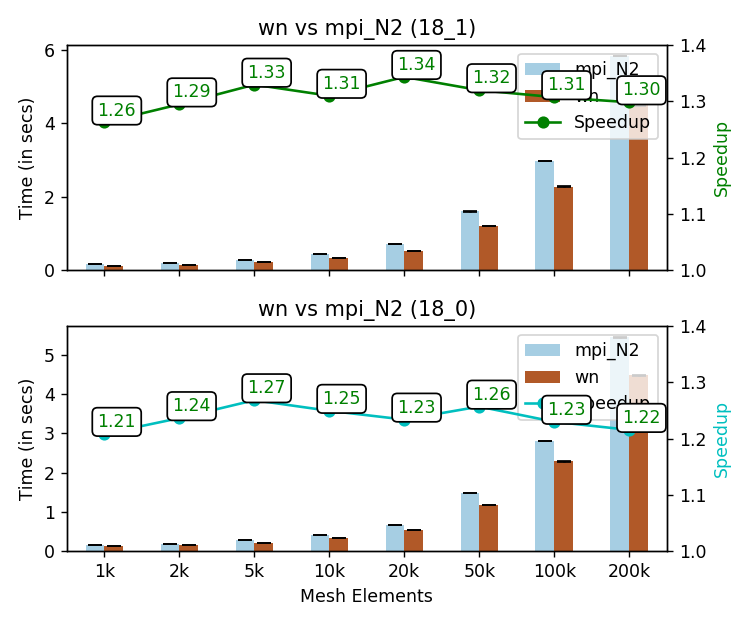

mpi_N2 wn 18_1
mpi_N2 wn 18_0


<IPython.core.display.Javascript object>


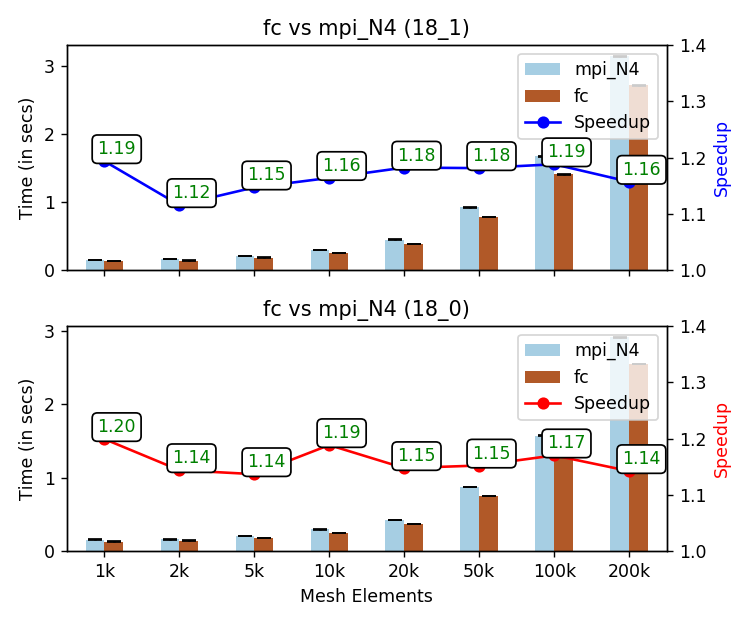

mpi_N4 fc 18_1
mpi_N4 fc 18_0


(array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002864B38E278>,
       dtype=object),
  <matplotlib.axes._subplots.AxesSubplot at 0x2864b6f5eb8>])

In [8]:
############################################
# MPI vs FPGA ONLY channels
############################################


designs = [['mpi_N2', 'wn', '18_1'], ['mpi_N2', 'wn', '18_0'], ['mpi_N4', 'fc', '18_1'], ['mpi_N4', 'fc', '18_0']]
colors = ['g','c','b','r']
lines = ['-','-','-','-']
plot_comparison(designs[:2], colors[:2], lines,savename='comp_mpifpgaonly_1', ylim=[1.0, 1.4])
plot_comparison(designs[2:], colors[2:], lines,savename='comp_mpifpgaonly_2', ylim=[1.0, 1.4])



<IPython.core.display.Javascript object>


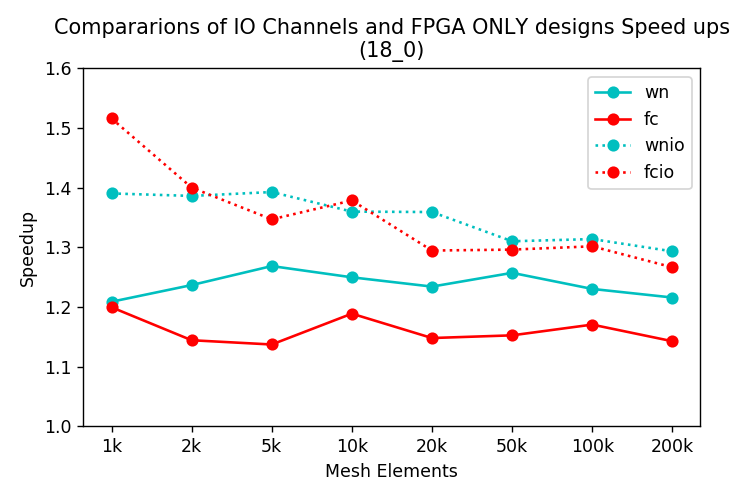

mpi_N2 wn 18_0
mpi_N4 fc 18_0
mpi_N2 wnio 18_0
mpi_N4 fcio 18_0
Saving file in iompifpgaonly_all_18_0


<IPython.core.display.Javascript object>


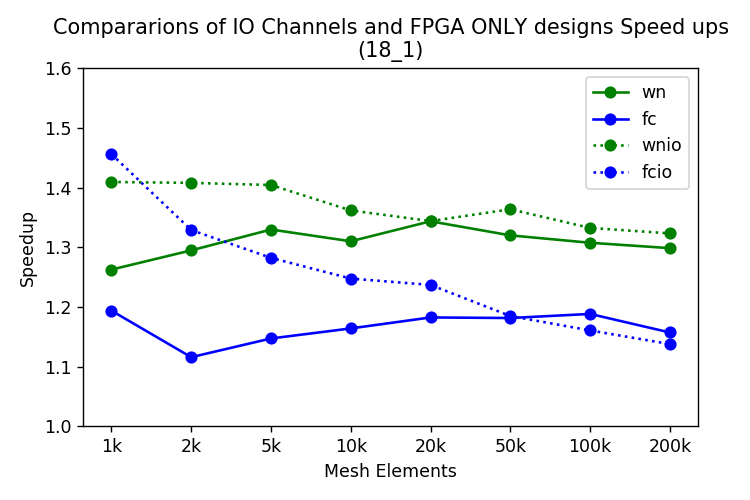

mpi_N2 wn 18_1
mpi_N4 fc 18_1
mpi_N2 wnio 18_1
mpi_N4 fcio 18_1
Saving file in iompifpgaonly_all_18_1


In [18]:
designs1 = [['mpi_N2', 'wn', '18_0'], ['mpi_N4', 'fc', '18_0'],
          ['mpi_N2', 'wnio', '18_0'], ['mpi_N4', 'fcio', '18_0']]
colors = ['c','r','c','r']
lines = ['-','-',':',':',]

plot_speedup(designs1, colors, lines, 'Compararions of IO Channels and FPGA ONLY designs Speedups (18_0)', savename='iompifpgaonly_all_18_0', a=False, ylim=[1.0, 1.6])


designs2 = [['mpi_N2', 'wn', '18_1'], ['mpi_N4', 'fc', '18_1'], 
          ['mpi_N2', 'wnio', '18_1'], ['mpi_N4', 'fcio', '18_1']]
colors = ['g','b', 'g','b']
lines = ['-','-',':',':',]

plot_speedup(designs2, colors, lines, 'Compararions of IO Channels and FPGA ONLY designs Speedups (18_1)', savename='iompifpgaonly_all_18_1', a=False, ylim=[1.0, 1.6])


<IPython.core.display.Javascript object>


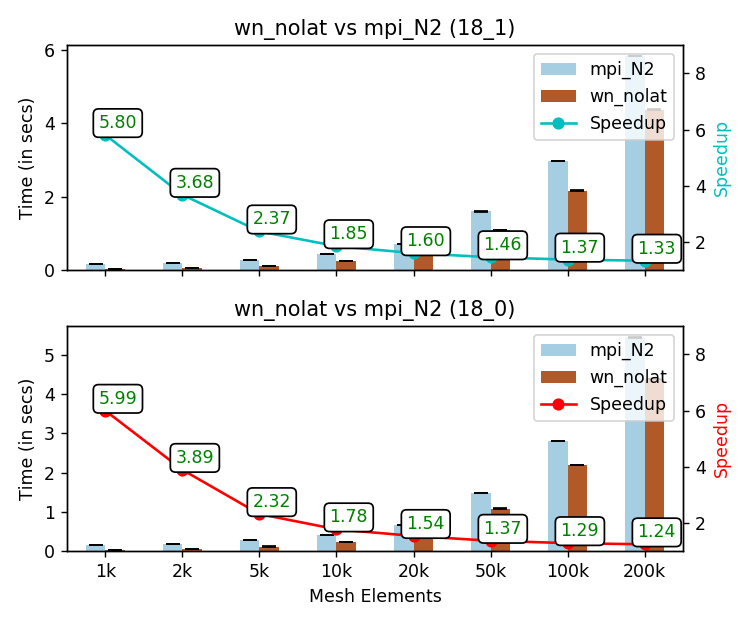

mpi_N2 wn_nolat 18_1
mpi_N2 wn_nolat 18_0


<IPython.core.display.Javascript object>


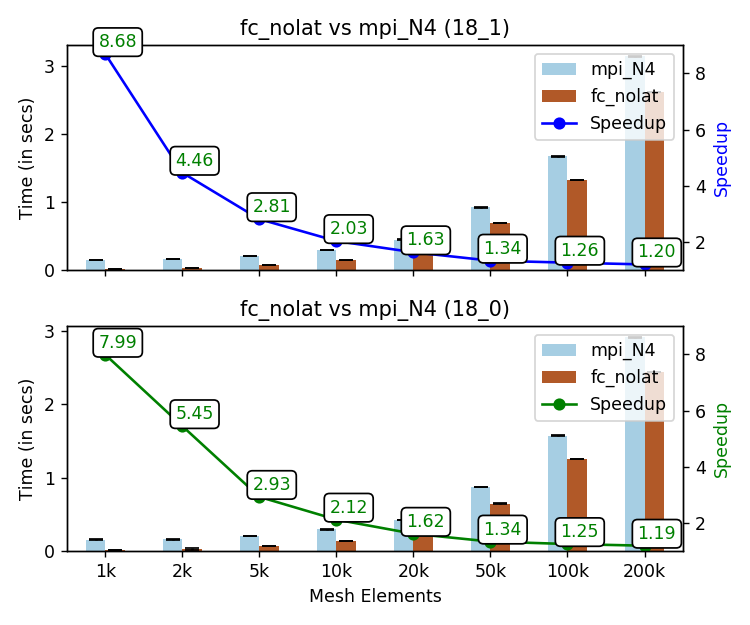

mpi_N4 fc_nolat 18_1
mpi_N4 fc_nolat 18_0


(array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002864DC3A5F8>,
       dtype=object),
  <matplotlib.axes._subplots.AxesSubplot at 0x2864b806e80>])

In [17]:
############################################
# MPI vs FPGA ONLY channels (No Latency)
############################################


designs = [['mpi_N2', 'wn_nolat', '18_1'], ['mpi_N2', 'wn_nolat', '18_0'], ['mpi_N4', 'fc_nolat', '18_1'], ['mpi_N4', 'fc_nolat', '18_0']]
colors = ['c','r','b','g']
lines = ['-','-','-','-',]
plot_comparison(designs[:2], colors[:2], lines, savename='comp_mpifpgaonly_nolat_1', ylim=[1,9])
plot_comparison(designs[2:], colors[2:], lines, savename='comp_mpifpgaonly_nolat_2', ylim=[1,9])

<IPython.core.display.Javascript object>


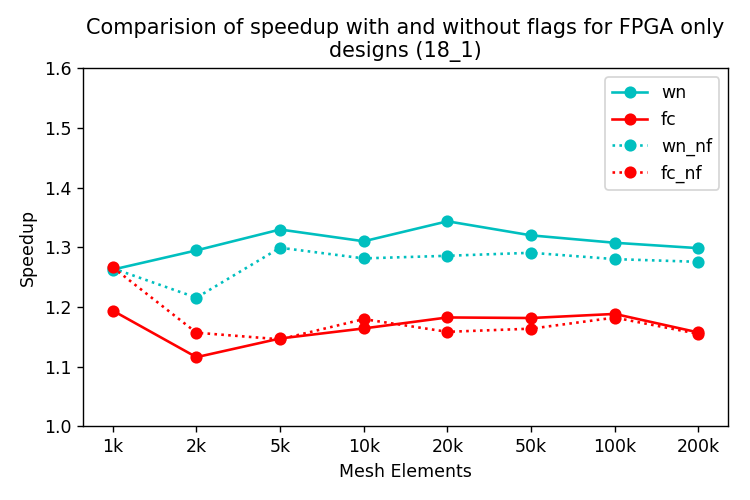

mpi_N2 wn 18_1
mpi_N4 fc 18_1
mpi_N2_nf wn_nf 18_1
mpi_N4_nf fc_nf 18_1
Saving file in flag_noflg_fpgaonly


<IPython.core.display.Javascript object>


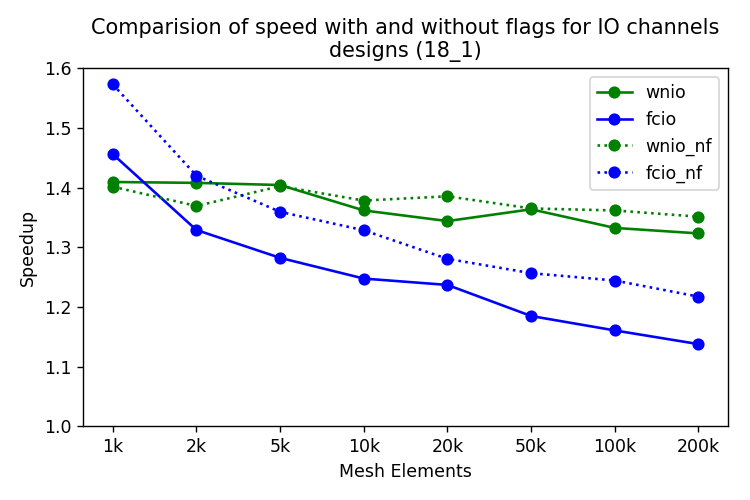

mpi_N2 wnio 18_1
mpi_N4 fcio 18_1
mpi_N2_nf wnio_nf 18_1
mpi_N4_nf fcio_nf 18_1
Saving file in flag_noflg_iochan


In [26]:
# designs1 = [['mpi_N2_nf', 'wn_nf', '18_1'], ['mpi_N4_nf', 'fc_nf', '18_1'],
#           ['mpi_N2_nf', 'wnio_nf', '18_1'], ['mpi_N4_nf', 'fcio_nf', '18_1']]
# colors = ['c','r','c','r']
# lines = ['-','-',':',':',]

# plot_speedup(designs1, colors, lines, 'Comparision of the speedup with No mememory optimization flags', savename='noflags', a=False)


designs2 = [['mpi_N2', 'wn', '18_1'], ['mpi_N4', 'fc', '18_1'], 
          ['mpi_N2_nf', 'wn_nf', '18_1'], ['mpi_N4_nf', 'fc_nf', '18_1']]
colors = ['c','r','c','r']
lines = ['-','-',':',':',]

plot_speedup(designs2, colors, lines, 'Comparision of speedup with and without flags for FPGA only designs (18_1)', savename='flag_noflg_fpgaonly', a=False, ylim=[1, 1.6])


designs3 = [['mpi_N2', 'wnio', '18_1'], ['mpi_N4', 'fcio', '18_1'], 
          ['mpi_N2_nf', 'wnio_nf', '18_1'], ['mpi_N4_nf', 'fcio_nf', '18_1']]
colors = ['g','b', 'g','b']
lines = ['-','-',':',':',]

plot_speedup(designs3, colors, lines, 'Comparision of speed with and without flags for IO channels designs (18_1)', savename='flag_noflg_iochan', a=False, ylim=[1, 1.6])


# designs4 = [['mpi_N2', 'mpi_N2_nf', '18_1'], ['mpi_N4', 'mpi_N4_nf', '18_1']]
# colors = ['g','b', 'g','b']
# lines = ['-','-',':',':',]

# plot_speedup(designs4, colors, lines, 'Comparision of speed with and without flags for IO channels designs ', savename='mpi_noflg_iochan', a=False)
